# Projectile Motion

Armed with this knowledge of trigonometry we may now pose and solve problems of **two-dimensional motion.**

For this week we will study the motion of a projectile, such as a kicked soccer ball, or an aid-package dropped from
an airplane.

In either case we will denote the **position** at time $t$ by

$$(x(t), y(t))$$ 

and the **velocity** at time $t$ by

$$(v_x(t),v_y(t))$$

Just as in one-dimension, these future values depend on the initial values

$$
  x(0) = x_0 \\
  y(0) = y_0  \\
  v_x(0) = v_{x0} \\
  v_y(0) = v_{y0} 
$$

and on gravity, $g$. In particular, the **equations of motion** are

$$
  \boxed{ x(t) = x_0 + v_{x0}t \\
  y(t) = y_0 + v_{y0}t - (g/2)t^2 }
$$

Let's code up a simple soccer kick, at the origin, and pointed 45 degrees east, with sufficient leg power to leave the foot at $10\sqrt 2$ meters per second.

Just as before, in order to know the correct time interval for simulation I must know how long it will take to hit the ground. As before this requires that we solve $y(t_{hit})=0$ for

$$
 t_{hit} = \frac{v_{y0} + \sqrt{v_{y0}^2+2gy_0}}{g}  \tag{thit}
$$

thit =  4.077471967380224


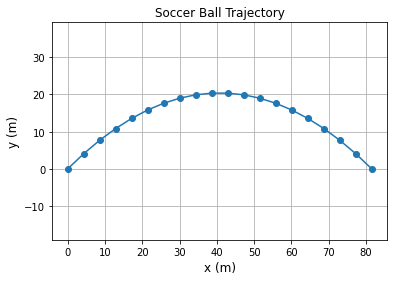

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x0 = 0   # m
y0 = 0   # m
vx0 = 20  # m/s
vy0 = 20  # m/s
g = 9.81 # m/s^2

thit = (vy0 + np.sqrt(vy0**2+2*g*y0))/g
print('thit = ', thit)

t = np.linspace(0,thit,20)

x = x0 + vx0*t
y = y0 + vy0*t - (g/2)*t**2

plt.plot(x, y, 'o-')
plt.xlabel('x (m)', fontsize=12)
plt.ylabel('y (m)', fontsize=12)
plt.axis('equal')
plt.title('Soccer Ball Trajectory')
plt.grid('on');

Does this look right to you? Do you see the motion? We will animate this soon, but not before making many more experiments and better understanding these initial conditions - and returning to our old questions 

- how fast was it moving when it hit the ground?
- how high did it get?
- how long did it take to get to it's highest point?

and adding one more (very important) question

- where does it hit the ground?

First off, we used geometric language to say that our initial velocity, $(10,10)$, was at 45 degrees and of **magnitude** $10\sqrt 2$ m/s. Can you reconcile these statements with the figure below?

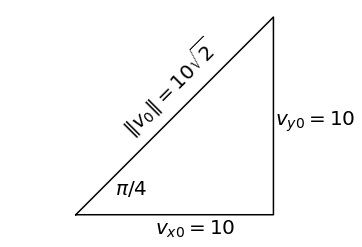

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.array([0, 10, 10, 0])
y = np.array([0, 0, 10, 0])
plt.plot(x,y,'k')  
plt.text(2,4,'$\Vert v_0\Vert =10\sqrt{2}$',fontsize=20, rotation = 45)
plt.text(4,-1,'$v_{x0}=10$',fontsize=20)
plt.text(10.1, 4.5,'$v_{y0}=10$',fontsize=20)
plt.text(2,1,'$\pi/4$',fontsize=20)
plt.axis('off')
plt.axis('equal');

On contrasting this with last week's picture

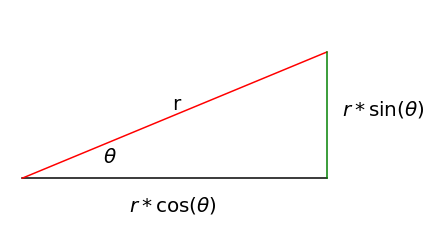

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

theta = np.pi/8
plt.plot([0, np.cos(theta)],[0, 0],'k')  
plt.text(0.5*np.cos(1.1*theta), 0.5*np.sin(1.1*theta),'r',fontsize=20)
plt.plot([0, np.cos(theta)],[0, np.sin(theta)],'r')
plt.plot([np.cos(theta), np.cos(theta)],[0, np.sin(theta)],'g')
plt.text(1.05*np.cos(theta), 0.5*np.sin(theta),'$r*\sin(\\theta)$',fontsize=20)
plt.text(0.35*np.cos(theta), -.1,'$r*\cos(\\theta)$',fontsize=20)
plt.text(0.25*np.cos(theta/2), 0.25*np.sin(theta/2),'$\\theta$',fontsize=20)
plt.axis('off')
plt.axis('equal');

We see that we can indeed specify the initial velocity with two numbers, an angle, say $\theta$, and a magnitude, say $r$, in which case

$$
  \boxed{ v_{x0} = r\cos(\theta) \\
  v_{y0} = r\sin(\theta) }
$$

Let's add this feature to our soccer ball code and see where its takes us

Please enter the kick angle, in degrees: 20
Please enter the magnitude of the initial velocity, in m/s: 10


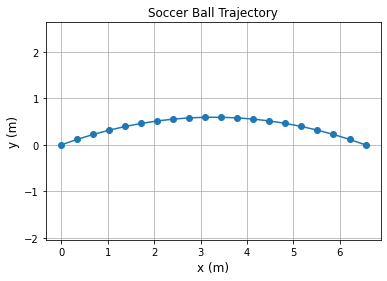

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

theta_deg = input('Please enter the kick angle, in degrees: ')
theta = float(theta_deg)*np.pi/180
mag = float(input('Please enter the magnitude of the initial velocity, in m/s: '))
x0 = 0   # m
y0 = 0   # m
vx0 = mag*np.cos(theta)  # m/s
vy0 = mag*np.sin(theta)  # m/s
g = 9.81 # m/s^2

thit = (vy0 + np.sqrt(vy0**2+2*g*y0))/g

t = np.linspace(0,thit,20)

x = x0 + vx0*t
y = y0 + vy0*t - (g/2)*t**2

plt.plot(x, y, 'o-')
plt.xlabel('x (m)', fontsize=12)
plt.ylabel('y (m)', fontsize=12)
plt.axis('equal')
plt.title('Soccer Ball Trajectory')
plt.grid('on');

Again, does this make sense? Try lots of angles and lots of magnitudes.

Let's now return to our formula for $t_{hit}$ and note that when we launch from the ground, $y_0$, that $t_{hit}$ is simply

$$
  t_{hit} = 2v_{y0}/g = 2r\sin(\theta)/g. \tag{thit_soccer}
$$

If we plug this into our $x(t)$ we'll be able to see **how far** the ball traveled! If we assume (naturally that $x_0=0$ too) then

$$
  \eqalign{
  x_{hit} &= x(t_{hit}) \cr
          &= x_0 + v_{x0}t_{hit} \cr
          & = 2r\cos(\theta)r\sin(\theta)/g \cr
          & = r^2\sin(2\theta)/g}  \tag{xhit_soccer}
$$

where in the last step we used SiCo+SiCo. Can we reconcile this with our first soccer kick? In that case $r=10\sqrt 2$ and $\theta=\pi/4$ and so our formula predicts

$$
  x_{hit} = 200\sin(\pi/2)/g = 200/9.81 \approx 20.37\ m
$$

just as in our first figure!

Can we use the $x_{hit}$ formula to help score a goal? If my typical angle is $\theta=\pi/6$ (30 degrees) then how hard should I kick to reach the goal 30 meters away? That is, what value of $r$ satisfies

$$
  30 = r^2\sin(\pi/3)/g
$$

As $\sin(\pi/3) = \sqrt{3}/2$ we see that

$$
  r = \sqrt{60g/\sqrt{3}} \approx 18.434\ m/s
$$

Try this $r$ and $\theta$ in our second soccer cell to see if you hit the goal.

**Exercise 1.** What $r$ should I kick with to hit the goal 40 meters away if I kick with angle

  (a) 20 degrees

  (b) 30 degrees
  
  (c) 40 degrees

Show all of your work in the cell below. (Warning: python assumes radians)

In [5]:
np.sqrt(9.81*40/np.sin(2*20*np.pi/180))

24.70761076389269

Instead of asking for magnitude given angle we could instead ask for angle given magnitude. This might correspond to a goalie kicking as hard as possible but choosing the angle to reach a desired team-mate down-field.

In this case we rearrange our $x_{hit}$ formula to solve for $\theta$. To begin, do you agree that

$$
  \sin(2\theta) = x_{hit}g/r^2
$$

The get at the $\theta$ we need to undo (or invert) the sine function. This was done with your calculator in Algebra II by pressing the sin and inv keys. This is done in numpy via the arcsin function. With that in hand we can solve our angle problem as as

$$
  \theta = \frac{1}{2}\arcsin(x_{hit}g/r^2)
$$

Please note that all angle functions in python presume you are working in radians. 

**Exercise 2.** What $\theta$ (in degrees) should I kick with to hit the goal 40 meters away if I kick with $r$ equal to

  (a) 20 m/s

  (b) 25 m/s
  
  (c) 30 m/s

Show all of your work in the cell below.

In [8]:
(1/2)*np.arcsin(40*9.81/30**2)*180/np.pi

12.924471256992936

We now shift our attention to an aid-package "dropped" from an airplane. For example, if the plane is flying at an altitude of 1000 meters at a velocity of 100 meters/second then our first cell reveals that our package will land about 1400 meters in front of our drop position!

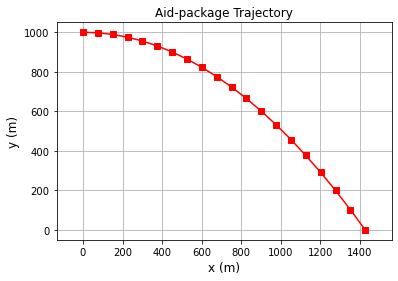

In [41]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x0 = 0   # m
y0 = 1000   # m
vx0 = 100  # m/s
vy0 = 0  # m/s
g = 9.81 # m/s^2

thit = (vy0 + np.sqrt(vy0**2+2*g*y0))/g

t = np.linspace(0,thit,20)

x = x0 + vx0*t
y = y0 + vy0*t - (g/2)*t**2

plt.plot(x, y, 'rs-')
plt.xlabel('x (m)', fontsize=12)
plt.ylabel('y (m)', fontsize=12)
plt.axis('equal')
plt.title('Aid-package Trajectory')
plt.grid('on');

Again, does this make sense to you? Would you rather translate this code into feet and miles per hour?

As $v_{y0}=0$ do you see that our $t_{hit}$ formula is simply

$$
  t_{hit} = \sqrt{2y_0/g}   \tag{thit_aid}
$$

Using the $y_0= 1000$ from our example we find that the aid package took

$$
  t_{hit} = \sqrt{2000/9.81} \approx 14.3
$$

seconds to reach the ground. As $x_0$ is still presumed 0 our formula for $x_{hit}$ is still

$$
  x_{hit} = v_{x0}t_{hit}
$$

which, in our example predicts

$$
  x_{hit} = 1000*14.3 = 1430\ m
$$

as in our python graph. So theory and numerics continue to agree. For this setting however our aid agency is quite interested in the impact velocity, i.e., how fast it traveling when it lands? Will is bounce or break or both? How much
and what kind of insulation should we use? These latter questions all depend on our solution to first question, how fast
is it traveling when it lands.

For this, we must augment our position equations with these velocity equations

$$
  v_x(t) = v_{x0} \\
  v_y(t) = v_{y0} - gt
$$

These say that the $x$ component of the in flight velocity is simply it's initial velocity, while the $y$ component of the inflight velocity decreases with time (due to gravity). 

As such, these components at $t_{hit}$ are

$$
  v_x(t_{hit}) = v_{x0} \\
  v_y(t_{hit}) = -gt_{hit} = -\sqrt{2y_0g}
$$

and so the **terminal velocity** is the associated **magnitude**

$$
  \boxed{v_{hit} = \sqrt{v_x(t_{hit})^2 + v_y(t_{hit})^2} = \sqrt{v_{x0}^2 + 2y_0g}}  \tag{vhit_aid}
$$

which, using the values above, yields

$$
  v_{hit} = \sqrt{100^2 + 2000g} \approx 172.1\ m/s
$$



**Exercise 3.** This $v_{hit}$ is deemed too large. Let us help the pilot find the right altitude for the drop. Let's assume that $v_{x0}=100\ m/s$ remains her safe cruising speed. Please find $y_0$ so that the package's terminal velocity is

 (a) 150 m/s
 
 (b) 125 m/s
 
 (c) 100 m/s
 
Please show all of your work in the cell below.

In [3]:
(3 - 2) / (2 * 10)

0.05

At these velocities we may still expect a considerable bounce. To predict the bounce we need to know the terminal angle as well. In the exercise above we were given the hypotenuse, $v_{hit}$, and the base $v_{x0}$, and since we know that the base is simply the product of the hypotenuse and the cosine of its angle with the base, i.e.,

$$
  v_{x0} = v_{hit}\cos(\theta_{hit})
$$

we may use $\arccos$ to find $\theta_{hit}$.

**Exercise 4.** Find the terminal angle for each of the three parts of Exercise 3. Please show all of your work in the cell below.